In [ ]:
import pandas as pd
import re

df = pd.read_csv('/content/SLOPD_Data_Mar12.csv')
df

,IncidentID,Date,Received,Dispatched,Arrived,Cleared,Address,Comment,Type,Category,Day_of_Week,Grid
0,240122012,1/22/2024,7:30,7:40,NaN,7:40,"HIGUERA S & SUBURBAN; GRID I-17, San Luis",WHI TRUCK WITH EQUIPTMENT IN BACK L/ 7P72370,Traffic Offense,Traffic,Monday,I-17
1,240122013,1/22/2024,7:57,7:59,8:14,8:16,3232 HIGUERA 5 # 102; DEPT OF CORREC7IONS,GLASS BREAK OFFICE B14,Alarm Audible,Non-violent,Monday,J-12
2,240122014,1/22/2024,7:54,8:05,8:13,9:02,"BROAD 8 HIGH; GRID K-11, San Luis Obispo,",POWERLINE POLE ABOUT TO FALL,Assist Req,Other,Monday,K-11
3,240122015,1/22/2024,8:45,NaN,8:47,8:50,"1431 BOxW00D; GRID O-16, San Luis Obispo,",NaN,911 Abandon,Other,Monday,O-16
4,240122016,1/22/2024,8:50,8:56,NaN,9:06,3592 BROAD ti 102; GYPSY AND OAK SALON; GR,1198 WITH RP PRIOR TO OBTAIN GATE KEY,Trespassing,Non-violent,Monday,I-07
...,...,...,...,...,...,...,...,...,...,...,...,...
4069,240310093,3/10/2024,23:12,23:14,NaN,23:14,"1239 FOOTHILL # 203; GRID K-06, San Luis","IMMEDIATE DISCONNECT - NO ANSWER ON CB, MSG LEFT",9-1-1 ABANDON,NaN,NaN,K-06
4070,240310094,3/10/2024,23:51,23:53,23:55,0:19,1102 HIGUERA; BANK OF AMERICA ATM; GRID K,"SINGLE VEH TC, BMW HIT CURB AND TREE",COLL NON INJ,NaN,NaN,NaN
4071,240311001,3/11/2024,0:32,0:36,NaN,0:38,"3000 AUGUSTA; JUDSON TERRACE; GRID M-12,",APT 143,Welfare Check,NaN,NaN,M-12
4072,240311002,3/11/2024,1:53,1:57,2:14,2:49,1010 MURRAY; SIERRA VISTA HOSPITAL; GRID,FEMALE BEING TREATED IN RM 3 WHO IS BELLIGEREN...,Assist Req,NaN,NaN,NaN


In [ ]:
#Homelessness Analysis

# Assuming df is your DataFrame containing the incidents data
# Fill NaN values in 'Comment' with an empty string
df['Comment'].fillna('', inplace=True)
df['Address'].fillna('', inplace=True)
df['Type'].fillna('', inplace=True)

# Create a new column 'Homeless' initialized with 0
df['Homeless'] = 0

# Use str.contains() with regular expression to check if 'Comment' contains 'Trans' or 'Transient' as standalone words
# If True, set 'Homeless' to 1
df.loc[df['Comment'].str.contains(r'\btrans\b|transient|homeless|panhandling', case=False), 'Homeless'] = 1
df.loc[df['Address'].str.contains('homeless', case=False), 'Homeless'] = 1
df.loc[df['Type'].str.contains('MC-Camping|MC-Panhandling', case=False), 'Homeless'] = 1

In [ ]:
def is_violent(row):
    if row['Type'] == 'Welfare Check':
        return False
    # List of keywords indicating violence or threat
    violent_keywords = ['assault', 'violent', 'threat', 'threaten', 'threatening',
    'attack', 'harm', 'weapon', 'fight', 'physical', 'throw', 'throwing', 'yell',
    'yelling', 'scream', 'screaming', 'follow', 'followed', 'following', 'harass', 'harassing',
    'harassment', 'harassed', 'kill']
    # Regular expression pattern to match variations of violent phrases
    pattern = re.compile(r'\b(?:' + '|'.join(violent_keywords) + r')\b', flags=re.IGNORECASE)
    # Check if any of the keywords appear in the comment
    if re.search(pattern, row['Comment']):
        return True
    else:
        return False

# Apply the function to the 'comments' column
df['is_violent'] = df.apply(is_violent, axis=1)

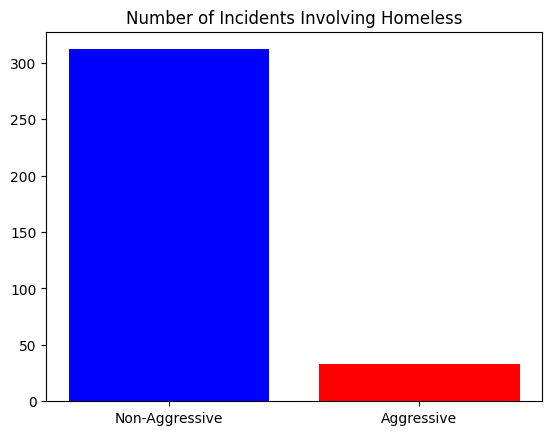

In [ ]:
import matplotlib.pyplot as plt

# Count the number of violent and non-violent incidents
violent_count = len(df[(df['is_violent']) & (df['Homeless'] == 1)])
non_violent_count = len(df[(~df['is_violent']) & (df['Homeless'] == 1)])

# Create a bar plot
plt.bar(['Non-Aggressive', 'Aggressive'], [non_violent_count, violent_count], color=['blue', 'red'])

# Add title and labels
plt.title('Number of Incidents Involving Homeless')

# Show the plot
plt.show()